<a href="https://colab.research.google.com/github/cbe410/python-data-analysis/blob/master/CBE410_Python_Data_Analysis_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Pre-introduction!**

In [367]:
print('Hello World!')

Hello World!


In [368]:
#from google.colab import drive
#drive.mount('/content/drive')

# **1. Introduction**

Python is a modern and powerful programming language that simplifies the task of data analysis and visualization in a broad range of disciplines, including the physical sciences. 

<figure>
<center>
<img src='https://matplotlib.org/_images/anatomy1.png' height="300">
<img src='https://matplotlib.org/_images/sphx_glr_irregulardatagrid_001.png' height="300">
<figcaption>Anatomy of a figure and contour plot from Matplotlib</figcaption>
</center>
</figure>

There are many elements that go into making a plot not just visually pleasing, but informative, and effective in presenting information in useful manner. Matplotlib has lots of resources and examples of high quality plots, and the code that produces them.

[Anatomy of a figure](https://matplotlib.org/gallery/images_contours_and_fields/irregulardatagrid.html#sphx-glr-gallery-images-contours-and-fields-irregulardatagrid-py) and [contour plot](https://matplotlib.org/gallery/images_contours_and_fields/irregulardatagrid.html#sphx-glr-gallery-images-contours-and-fields-irregulardatagrid-py) from [Matplotlib](https://matplotlib.org)



---


The goal of this course content is to quickly introduce/re-familiarize you with the basics of data reading/writing, manipulation, and plotting in Python. Thereafter, you should use Python (or another numerical computing application of your choice, but *not* Excel!) for data manipulation and plotting for the remainder of the assignments in this course.

Online resources and tutorials are plentiful for Python, and for the Jupyter Notebook/Lab. A few links to such resources are provided below.

Excellent tutorials: https://www.w3schools.com/python/python_intro.asp

Guide to Python: https://docs.python-guide.org/

Learning Python: https://www.learnpython.org/

Plotting with Matplotlib: https://matplotlib.org

Python Basics: https://pythonbasics.org/

Jupyter Notebook: https://jupyter.org/

A brief introductory video re: Google Colab:
https://www.youtube.com/watch?v=inN8seMm7UI

---


A few introductory tips about Python - it uses lists and dictionaries as its basic data structure. Indexing is from `0` as opposed to `1` in MATLAB and some other programming languages. Buyer beware!
When we index lists, the first element in the list has index `0`. If we splice a list to call out only certain elements, using `list[start:stop]` note that this retrieves elements from `start` up to but not including `stop`. See the output of the code snippets below as an illustration. Note also that the last element in a list can be referenced as `list[-1]`, the second to last as `list[-2]` etc., up to `-n` for `n<=len(list)`. The `range(n,m)` function is useful for generating lists of sequentially occuring integers between `n` and `m`.

In [369]:
a = [0,1,2,3,4,5,6,7,8,9]
b = range(0,9)
print(a)
for x in b:
  print(x)
c = [x for x in range(0,9)]
print('Elements of list "c" are:',c)
print(a[0:6])


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
1
2
3
4
5
6
7
8
Elements of list "c" are: [0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5]


To find the index of an item in a list, we can use the `.index()` method.

In [370]:
a = ['Lamps',3,'Trees',7,9]
print('The index in the list where element "Trees" occurs is:',a.index('Trees'))
print('The index in the list where element "3" occurs is:',a.index(3))

The index in the list where element "Trees" occurs is: 2
The index in the list where element "3" occurs is: 1


We can create dictionaries, which you can think of as small databases:

In [371]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}


We can retrieve information from the dictionary by `key`, check the length, and assign new data:

In [372]:
x = thisdict["model"]
print(x)
y = thisdict.get("model")
print(y)
print('The length of this dictionary is:',len(thisdict))
thisdict["year"] = [2018, 1964]
print(thisdict)

Mustang
Mustang
The length of this dictionary is: 3
{'brand': 'Ford', 'model': 'Mustang', 'year': [2018, 1964]}


We can loop through `keys` and `values` using the `items()` method:

In [373]:
for x, y in thisdict.items():
  print(x, y)

brand Ford
model Mustang
year [2018, 1964]


In [374]:
for x in thisdict:
  print(x)
for x in thisdict:
 print(thisdict[x])

brand
model
year
Ford
Mustang
[2018, 1964]


We can print all key names, as well as all values:

More examples are available [here](https://www.w3schools.com/python/python_dictionaries.asp)


---


#**2. Importing Data for Analysis**
We will use Python to analyze some sample reaction data to determine an activation energy. The data is stored in an Excel file hosted in a Github repository I created for CBE410 - [cbe410/python-data-analysis](https://github.com/cbe410/python-data-analysis)

Here, we will make use of the well known fact that the temperature dependence of a rate constant is related to the activation energy $E_a$ as shown in Equation $\eqref{activation}$ below.

\begin{equation}
  k = k_0\exp(-E_a/RT) \tag{1}
\end{equation}



where $R$ is the universal gas constant, equal to $8.314 \,\mathrm{J.K^{-1}.mol^{-1}}$. The linearized version of the above equation is

\begin{equation}
 \ln\,k = \ln\, k_0 -\frac{E_a}{RT} \tag{2}
\end{equation}


First, we will need to read in our data. A lot of the raw data for experiments in this class are output in Excel sheets. They may be formatted as regular ascii data, `.csv` files, or full-fledged `.xlsx` files. We have a variety of tools at our disposal for reading in the data. Here to make life simple (?) we will use [Pandas](https://pandas.pydata.org/), a versatile tool (library) for data analysis and manipulation built on top of Python. Here, we will just use it to read in data! Very simple.

In [375]:
import pandas as pd

In [433]:
column_names = ["T","k","Ea"]
#data_excel_path = "https://github.com/cbe410/python-data-analysis/raw/master/SampleData.xlsx"
data_excel_path = "/content/drive/My Drive/CBE410/SampleData.xlsx"
rxn_data = pd.read_excel(data_excel_path, sheet_name="ReactionData", names=column_names,header=None)

In [431]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wEUKoPOef41gy7zgBlAmsY7gG1ywduO7gfP8GRlIEmVu2BzePku3VE
Mounted at /content/drive


Alternatively, we could read in a dictionary

In [377]:
sheets = ["ReactionData"]
data_dict = pd.read_excel(data_excel_path,sheets,header=None,names=column_names)

In [378]:
data_dict

{'ReactionData':              T            k          Ea
 0  Temperature            k  Ea(kj/mol)
 1          340  5.07085e-06       71.45
 2          360  9.40194e-06         NaN
 3          380  1.32791e-05         NaN
 4          400  1.79617e-05         NaN
 5          420  2.75748e-05         NaN}

In [379]:
rxn_data

,T,k,Ea
0,Temperature,k,Ea(kj/mol)
1,340,5.07085e-06,71.45
2,360,9.40194e-06,NaN
3,380,1.32791e-05,NaN
4,400,1.79617e-05,NaN
5,420,2.75748e-05,NaN


We can create a list of values from the structure created by our read operation:

In [380]:
print(rxn_data["T"].values.tolist())

['Temperature', 340, 360, 380, 400, 420]


In [381]:
print(data_dict.keys())

dict_keys(['ReactionData'])


In [382]:
Temperature = pd.read_excel(data_excel_path, sheet_name="ReactionData", names=column_names[0],header=None)
Rates = pd.read_excel(data_excel_path, sheet_name="ReactionData", names=column_names[1],header=None)

In [383]:
T = data_dict["ReactionData"]["T"]
k = data_dict["ReactionData"]["k"]

In [384]:
T[::]

0    Temperature
1            340
2            360
3            380
4            400
5            420
Name: T, dtype: object

We need to strip out the first (i.e. element `0`) entry, as the Excel sheet had the name of the data in the first row.

In [385]:
T = T[1::]

In [386]:
T

1    340
2    360
3    380
4    400
5    420
Name: T, dtype: object

In [387]:
k=k[1::]

In [388]:
k

1    5.07085e-06
2    9.40194e-06
3    1.32791e-05
4    1.79617e-05
5    2.75748e-05
Name: k, dtype: object

In [389]:
k*5

1    2.53543e-05
2    4.70097e-05
3    6.63954e-05
4    8.98085e-05
5    0.000137874
Name: k, dtype: object

Data Frames and Lists

In [390]:
products = {'Product': ['Tablet','iPhone','Laptop','Monitor'],
            'Price': [250,800,1200,300]
            }

df = pd.DataFrame(products, columns= ['Product', 'Price'])

product = df['Product'].values.tolist()
print (product)

['Tablet', 'iPhone', 'Laptop', 'Monitor']


In [391]:
T=T.values.tolist()

In [392]:
T

[340, 360, 380, 400, 420]

In [393]:
k=k.values.tolist()

In [394]:
k

[5.070850274620396e-06,
 9.401939100047988e-06,
 1.327907504729011e-05,
 1.7961692172790197e-05,
 2.7574811418482278e-05]

---

#**3. Plotting**


Okay - let's plot our data and see what it looks like, as $k(T)$ and then also 
as $\ln k(1/T)$. We will need to perform some simple maniulations of our data, for which `numpy` is far better suited, as described below. So we will import numpy. We will also need to import libraries for plotting.

In [395]:
import numpy  as np
import matplotlib.pyplot as plt
np.array(T)
np.array(k)

array([5.07085027e-06, 9.40193910e-06, 1.32790750e-05, 1.79616922e-05,
       2.75748114e-05])

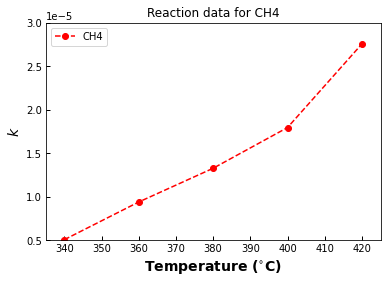

In [417]:
sample_name = 'CH4'
fig1 = plt.figure(1)
plt.title('Reaction data for '+sample_name) 
plt.xlabel('Temperature ($^{\circ}$C)',FontSize=14,FontWeight='bold') 
plt.ylabel('$k$',FontSize=14,FontWeight='bold')
plt.plot(np.array(T), np.array(k), marker="o",color="r",linestyle='--',label=sample_name)
plt.grid
plt.savefig("reaction_data_plot.png")
plt.tick_params('x',direction='in', length=4, width=1, colors='k',grid_color='r', grid_alpha=0.5)
plt.tick_params('y',direction='in', length=4, width=1, colors='k',grid_color='r', grid_alpha=0.5)
#plt.legend([sample_name],loc="upper left")
plt.legend(loc="upper left")
plt.ylim(5E-6,3E-5)
plt.xlim(335,425)
plt.show()

Not too shabby. How about now we look at $ln \,k$ vs $1/T$ on a linear scale:

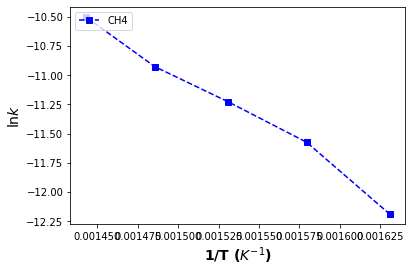

In [397]:
fig2 = plt.figure(2)
plt.axes(xscale='linear',yscale='linear')
plt.plot(1/(np.array(T)+273.15), np.array(np.log(k)),marker="s",color="b",linestyle='--',label=sample_name)
plt.xlabel('1/T ($K^{-1}$)',FontSize=14,FontWeight='bold') 
plt.ylabel('$\ln k$',FontSize=14,FontWeight='bold')
plt.legend(loc="upper left")
plt.show()

And finally, on a set of semilog axes. If we had a second data set to include, we could do so easily. I'll throw in some additonal data, just to show the syntax. For this purpose, I'll use a random number generator to scramble the rate data. This will also give us a chance to look at a simple `for` loop and the `.append` function. ***Take note of the indentation in Python! Loops and control functions must be properly indented, else you will get errors. Jupyter Notebooks provide automatic indentation, but care is still needed!***

In [420]:
import random #Generate a list of random numbers equal in length to the number of elements in k
randomlist = []
for i in range(0,len(k)):
  randomlist.append(random.random())
print('The random list is:',randomlist)

The random list is: [0.3314096592310053, 0.31950082083005726, 0.6016596559731954, 0.875741307955028, 0.43610720937304737]


Let's look a bit closer at the `range()` function - you may find yourself using it at some points!

In [399]:
t=range(0,5)
for x in t:
  print(x)

0
1
2
3
4


Okay - let's also put a bit of effort into improving the appearance of our plots! Tick mark directions, labels, etc all matter. Log-scale axes often present problems.

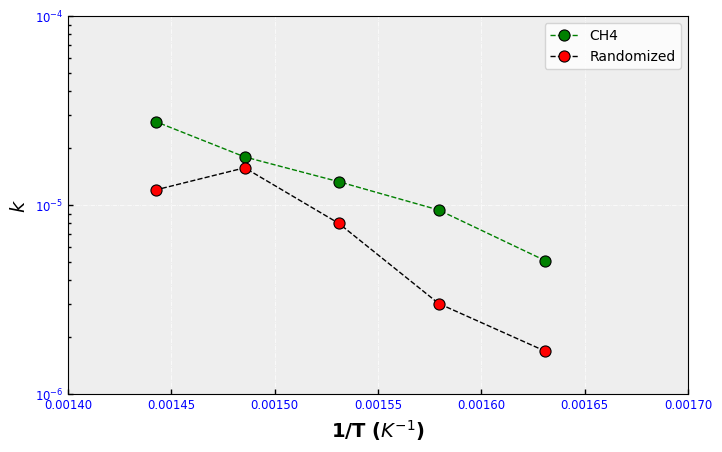

In [426]:
fig3, ax3 = plt.subplots(num=3,figsize=(8,5),dpi=100, facecolor='w', edgecolor='k')
#ax3.patch.set_facecolor('#ababab')
ax3.patch.set_facecolor('#dfdfdf')
ax3.patch.set_alpha(0.5)
# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier!
#fig.savefig('file.png', facecolor=fig.get_facecolor(), edgecolor='none')
#ax3 = plt.gca()
ax3.semilogy(1/(np.array(T)+273.15),np.array(k),marker="o",markerfacecolor="g",markeredgecolor='k',markersize=8,markeredgewidth=0.8,\
             linestyle='--',color='g',linewidth=1,label=sample_name)
ax3.semilogy(1/(np.array(T)+273.15),np.array(k)*np.array(randomlist),marker="o",markerfacecolor="r",markeredgecolor='k',markersize=8,markeredgewidth=0.8,\
             linestyle='--',color='k',linewidth=1,label='Randomized')
yvalues = np.concatenate((np.array(k),np.array(k)*np.array(randomlist)),0)
tick_array = np.logspace(np.log10(np.amin(yvalues)),np.log10(np.amax(yvalues)),5)
tick_array = np.round(tick_array,decimals=7)
tick_list = tick_array.tolist()
#plt.yticks(tick_list,tick_list)
#ax3.yaxis.grid(True,which='major')
ax3.tick_params(direction='in',labelcolor='b', labelsize='small', width=1, which='both')
#ax3.xaxis.set_tick_params(direction='in', which='both') #For setting tick direction in for major and minor ticks on x-axis only
ax3.grid(True, color='w',linestyle='-.',linewidth=0.5)
ax3.set_xlabel('1/T ($K^{-1}$)',FontSize=14,FontWeight='bold') 
ax3.set_ylabel('$k$',FontSize=14,FontWeight='bold')
ax3.legend(loc="best")
#ax3.ticklabel_format(axis='x',style='scientific',scilimits=(0,0),useMathText=True)
ax3.set_xlim(1.4E-3,1.7E-3)
ax3.set_ylim(1E-6,1E-4)
plt.show()

---

#**4. Embedding Images**
I previously saved my first plot as a `.png` file. Let's see if I can pull it up to display here, along with a sample image from GitHub! The file `reaction_data_plot.png` should appear in my list of Files in the pane on the left. Click to expand if needed. I can make a hyperlink to the file, which when clicked, will show the image in a new pane on the right. To do this, you can embed the file location, in this case,
```
/content/reaction_data_plot.png
```
in the text, and when rendered, it will create a link, i.e.: /content/reaction_data_plot.png
There are more elegant ways to display images however. You can create a hyperlink by getting the URL of the image, or a shareable link for a file in Google Drive. Alternatively, you can also display images inline using `!` before the image location. Here's an effort to do that, with a picture of a Penn Engineering cap hosted on Github.

![PennEngineering_cap](https://github.com/cbe410/python-data-analysis/blob/master/PennEngineering_cap.jpg?raw=true)



This feature is a bit tricky to use. Refer to [Google Colab documentation](https://research.google.com/colaboratory/faq.html) for more info. This Medium article [here](https://medium.com/analytics-vidhya/embedding-your-image-in-google-colab-markdown-3998d5ac2684) also has some info, and maybe the trick to doing it properly! Below, instead of using the markdown of Colab, I used standard `HTML` to insert an image.

<figure>
<center>
<img src='https://www.aiche.org/sites/default/files/images/courses/ELA113_Distillation%20Technology_for_Operators_ssk_60046637.jpg' height="300">
<figcaption>From AIChE - https://www.aiche.org/academy/courses/ela113/distillation-technology-operators</figcaption>
</center>
</figure>





# **5. Determining Slopes**

Okay. Now we will use Numpy to determine the gradient of $\ln k$ as a function of inverse temperature, $1/T$, in units of $K^{-1}$. We can accomplish this quite rapidly, but first, let's define $R$ as a variable, and give it a value:

In [401]:
R = 8.314

There are several ways to determine the slope of a line drawn through points. The simplest way recognized that the best fit slope, $m$ for datasets $x$ and $y$ is given by Equation \eqref{slope}  below. This will also give us an opportunity to introduce the concept of functions in Python, which may become useful to you later on!

\begin{equation}
 m = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=n}^n(x_i - \bar{x})^2} = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\bar{x}^2 - \bar{x^2}} \tag{2}
\end{equation}

So, this is just `((X*Y).mean() - X.mean()*Y.mean) / ((X**2).mean() - (X.mean())**2)`

Let's calculate it in a single line. Basic python is not really built for math. Performing element by element multiplication between lists is a bit obtuse:

In [416]:
a=[1,2,3,4]
b=[2,4,6,8]
product = [a[i]*b[i] for i in range(len(a))]
product

[2, 8, 18, 32]

Likewise, adding lists, or adding a number to all elements of a list requires a Pythonic approach!

In [403]:
sum = [x + 4 for x in a]
print('The result of adding 4 to each element in a is:',sum)

The result of adding 4 to each element in a is: [5, 6, 7, 8]


Numpy makes things much easier however, and we can use syntax that might be more intuitive, and/or familiar, if you've used MATLAB or other such tools before.

In [404]:
import numpy as np
product_numpy = np.array(a)*np.array(b)
sum_numpy = np.array(a) + 4
print('The product array is:',product_numpy)
print('The sum array is:',sum_numpy)

The product array is: [ 2  8 18 32]
The sum array is: [5 6 7 8]


With this in mind, let's go to work on our dataset. Let's help ourselves by defining a variable called `invT` that is inverse absolute temperture, and redefining `k` as a numpy list. Otherwise, we'd end up with unwieldy looking expressions like
 `slope = (((1/(np.array(T)+273.15))*(np.log(k))).mean() - ((1/(np.array(T)+273.15)).mean()*(np.log(k).mean())))/(.....)`



In [405]:
invT = 1/(np.array(T) + 273.15)
k = np.array(k)

In [406]:
slope = ((invT*np.log(k)).mean() - (invT.mean()*np.log(k).mean()))/( (invT**2).mean() - (invT.mean())**2)
slope
 

-8594.480772567294

In [427]:
Ea = -R*slope
print('The activation energy, in kJ/mol is:','{0:1.1f}'.format(Ea/1000))

The activation energy, in kJ/mol is: 71.5


Another way to accomplish the above is to use the `linregress` function from the statistics package of SciPy

In [428]:
from scipy.stats import linregress
slope2,intercept,pval,rval,err = linregress(invT,np.log(k))
Ea2 = -R*slope2
print('The activation energy, in kJ/mol is:','{0:1.1f}'.format(Ea2/1000))

The activation energy, in kJ/mol is: 71.5


If I needed to do this routinely, i.e. take a list of temperatures in deg C, and a list of associated rate constants, and extract the activation energy, I could write a short function to do so, in the following manner. I added here a `np.array(k)` just in case `k` is in original Python list form, even though at this point in our script execution, we know it is already a numpy array.

In [430]:
def solve_activation(temps,rates):
  invT = 1/(np.array(temps) + 273.15)
  logk = np.log(np.array(k))
  slope,intercept,p,r,err = linregress(invT,logk)
  Ea = -8.314*slope
  return Ea,intercept

Ea3,intercept = solve_activation(T,k)
k0 = np.exp(intercept)
print('The activation energy, in kJ/mol is:','{0:1.1f}'.format(Ea3/1000))
print('k_0 is :','{0:1.2f}'.format(k0))


The activation energy, in kJ/mol is: 71.5
k_0 is : 6.68


Now that we know the activation energy, we can calculate the expected rate constant

In [410]:
temps = np.linspace(330,440,num=20)
invtemps = 1/(temps+273.15)
k_calculated = k0*np.exp(-Ea3*invtemps/R)

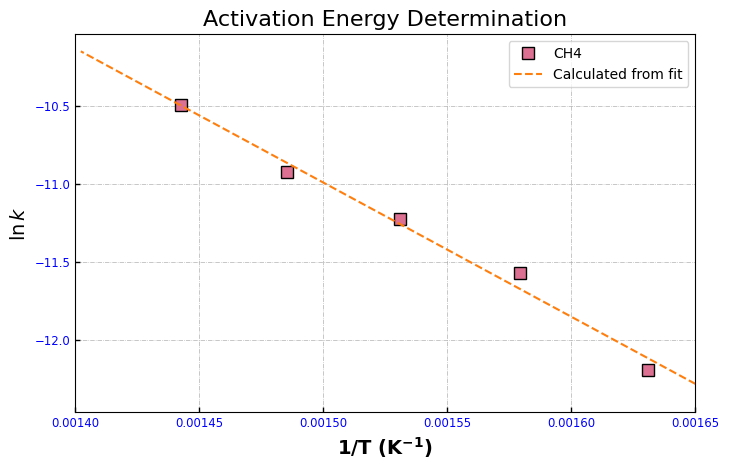

In [411]:
fig4, ax4 = plt.subplots(figsize=(8,5),dpi=100, facecolor='w', edgecolor='k')
ax4.set_xscale('linear')
ax4.set_yscale('linear')
#ax4.scatter(1/(np.array(T)+273.15), np.array(np.log(k)),marker="s",s=48,facecolor="mediumslateblue",edgecolor="k",linewidths=1,label=sample_name)
ax4.plot(1/(np.array(T)+273.15), np.array(np.log(k)),marker="s",markersize=8,markerfacecolor="palevioletred",markeredgecolor="k",markeredgewidth=1,linestyle='None',label=sample_name)
ax4.plot(invtemps,np.log(k_calculated),linestyle='--',label='Calculated from fit')
ax4.grid(True, linestyle='-.',linewidth=0.5)
ax4.tick_params(direction='in',labelcolor='b', labelsize='small', width=1, which='both')
ax4.set_xlabel('1/T ($\mathbf{K^{-1}}$)',FontSize=14,FontWeight='bold') 
ax4.set_ylabel('$\ln\, k$',FontSize=14,FontWeight='bold')
ax4.legend(loc="best")
ax4.set_title('Activation Energy Determination',fontsize=16,color='k')
ax4.set_xlim(0.0014,0.00165)
plt.show()



---
#**6. Looking forward**
Here we will start playing around with some of the data for the thermal transport assignment. The first thing we have to do is read the data from the Excel sheet. Here, I've linked to an Excel sheet of the data that is in my Google Drive, rather than hosted on GitHub. In reading the data, I didn't provide column names, so these will be read out automatically by ```pandas```.


In [412]:
#heat_data_path="/content/drive/My Drive/CBE410/Raw Heat Exchanger Data.xlsx"
heat_data_path_github="https://github.com/cbe410/python-data-analysis/raw/master/Raw%20Heat%20Exchanger%20Data.xlsx"
heat_data = pd.read_excel(heat_data_path_github, sheet_name="Raw Data")
heat_data

,Unnamed: 0,Hot Reservoir,Hot in,Hot mid,Hot out,Cold out,Cold mid,Cold in,Hot Flow,Cold Flow
0,Flow,ST-16,ST-1,ST-2,ST-3,ST-4,ST-5,ST-6,SC-1,SC-2
1,Direction,C,C,C,C,C,C,C,l/min,l/min
2,Counter-Current,44.9,41,39.7,38.6,31.4,29.9,29.5,1.4,2.2
3,Counter-Current,49.8,45.4,43.3,41.8,32.1,30.2,29.5,1.4,2.2
4,Counter-Current,54.6,49.4,46.8,44.8,32.8,30.5,29.5,1.4,2.2
5,Counter-Current,59.7,54.1,50.6,48.2,33.7,31,29.5,1.4,2.2
6,Counter-Current,59.7,53.8,49.2,47.7,33.2,30.6,29.5,1,2.2
7,Counter-Current,59.9,54.1,50.2,48.1,33.5,30.8,29.5,1.2,2.2
8,Counter-Current,59.4,54.3,50.8,48.3,33.8,30.9,29.5,1.4,2.2
9,Counter-Current,59.9,54.4,50.9,48.5,34,31.1,29.4,1.4,2


In [413]:
print(heat_data.columns)

Index(['Unnamed: 0', 'Hot Reservoir', 'Hot in', 'Hot mid', 'Hot out',
       'Cold out', 'Cold mid', 'Cold in', 'Hot Flow', 'Cold Flow'],
      dtype='object')


In [414]:
heat_data.keys()
heat_data["Hot Reservoir"][1:-2]

1        C
2     44.9
3     49.8
4     54.6
5     59.7
6     59.7
7     59.9
8     59.4
9     59.9
10    59.9
11    59.5
12    59.4
13    44.8
14      50
15    54.8
16    59.5
17    59.7
18    59.5
19    59.6
20    59.9
21    59.9
22    59.7
23    59.5
Name: Hot Reservoir, dtype: object